In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Tiamat as tiam
from scipy.optimize import curve_fit

([-inf, 0, -inf], [inf, inf, inf])
[[ 2.16794545e-04  7.97998309e-06 -1.27246180e-04]
 [ 7.97998309e-06  1.53472955e-05  3.73879739e-05]
 [-1.27246180e-04  3.73879739e-05  2.07848215e-04]]
tau:  0.8625289758866701


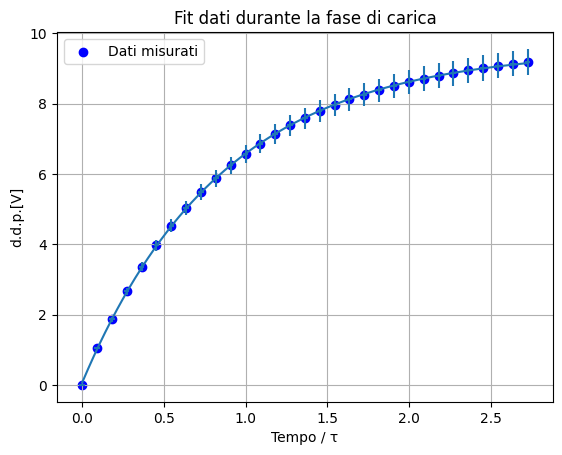

In [2]:
import Tiamat as tiam
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.stats import norm
T = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320, 336, 352, 368, 384, 400, 416, 432, 448, 464, 480])/176  # secondi
V_car = np.array([0, 1.037, 1.867, 2.662, 3.364, 3.970, 4.526, 5.034, 5.494, 5.877, 6.246, 6.568, 6.860, 7.130, 7.380, 7.580, 7.790, 7.960, 8.120, 8.260, 8.380, 8.500, 8.610, 8.710, 8.800, 8.870, 8.950, 9.020, 9.080, 9.140, 9.190])  # velocità

err_T = 1/60
err_V_car = (V_car)/25

# Funzione da fittare
def func(t, V_0, tau,d):
    return V_0 * (1-np.exp(-t / tau))+d

bounds = ([-np.inf,0,-np.inf],[np.inf,np.inf,np.inf])
print(bounds)
Xfit,Yfit,a,b,c,cov_matrix = tiam.fit_curve(T,V_car,func,min(T),max(T),err_X=None,err_Y=None,limiti=bounds)
plt.plot(Xfit,Yfit)
print("tau: ",b)

plt.errorbar(T, V_car, xerr= err_T, yerr= err_V_car, fmt= 'none')

plt.scatter(T, V_car, label="Dati misurati", color="blue")
plt.xlabel("Tempo / τ")
plt.ylabel("d.d.p.[V]")
plt.title("Fit dati durante la fase di carica")
plt.legend()
plt.grid()
plt.show()

([-inf, 0, -inf], [inf, inf, inf])
[[ 2.73956482e-03 -2.58250402e-04  0.00000000e+00]
 [-2.58250402e-04  6.03955626e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
tau:  0.9247067767617035


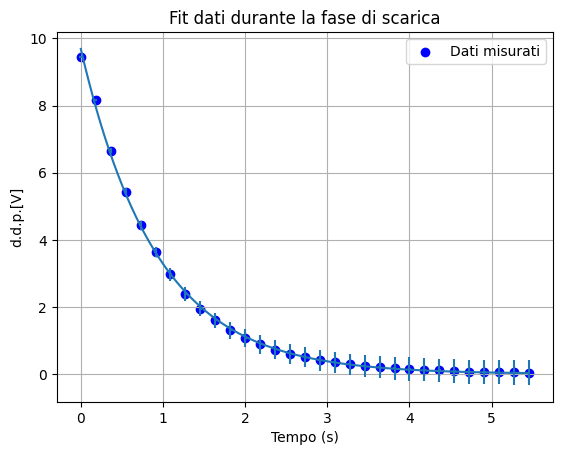

In [3]:
T_1 = np.array([0, 32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416, 448, 480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800, 832, 864, 896, 928, 960])/176 #sec
V_scar = np.array([9.45, 8.17, 6.66, 5.43, 4.430, 3.634, 2.967, 2.380, 1.942, 1.596, 1.307, 1.078, 0.885, 0.730, 0.604, 0.500, 0.413, 0.343, 0.286, 0.237, 0.210, 0.176, 0.148, 0.125, 0.106, 0.086, 0.073, 0.063, 0.054, 0.047, 0.042]) #V

err_T1 = 1/60
err_V_scar = (V_car)/25

# Funzione da fittare
def func(t, V_0, tau,d):
    return V_0 * (np.exp(-t / tau))

bounds = ([-np.inf,0,-np.inf],[np.inf,np.inf,np.inf])
print(bounds)
Xfit,Yfit,a,b,c,cov_matrix = tiam.fit_curve(T_1,V_scar,func,min(T_1),max(T_1),err_X=None,err_Y=None,limiti=bounds)
plt.plot(Xfit,Yfit)
print("tau: ",b)

plt.errorbar(T_1, V_scar, xerr= err_T1, yerr= err_V_scar, fmt= 'none')

plt.scatter(T_1, V_scar, label="Dati misurati", color="blue")
plt.xlabel("Tempo (s)")
plt.ylabel("d.d.p.[V]")
plt.title("Fit dati durante la fase di scarica")
plt.legend()
plt.grid()
plt.show()

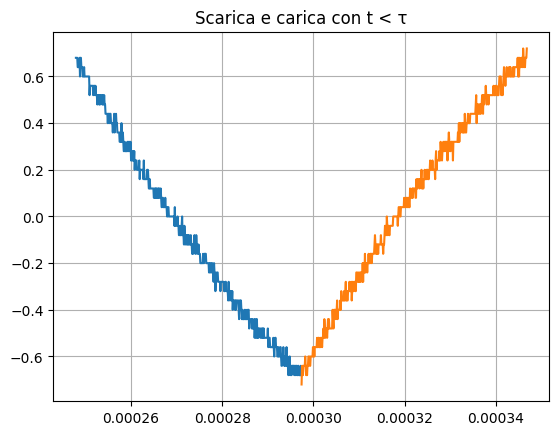

In [4]:
#Inserire dati scarica e carica
X1 = []
Y1 = []

counter = 0
with open('curva3datiscarica.txt') as f:
    for line in f:
        for word in line.split():
            if((' ' in word)==False):
                if(counter == 0):
                    X1.append(float(word))
                    counter = 1
                else:
                    Y1.append(float(word))
                    counter = 0

X2 = []
Y2 = []

counter = 0
with open('curva3daticarica.txt') as f:
    for line in f:
        for word in line.split():
            if((' ' in word)==False):
                if(counter == 0):
                    X2.append(float(word))
                    counter = 1
                else:
                    Y2.append(float(word))
                    counter = 0

Y1P = (np.array(Y1))
Y2P = (np.array(Y2))
plt.plot(X1,Y1P)
plt.plot(X2,Y2P)
plt.grid()
plt.title("Scarica e carica con t < τ")
plt.savefig("Curva3.png")
plt.show()

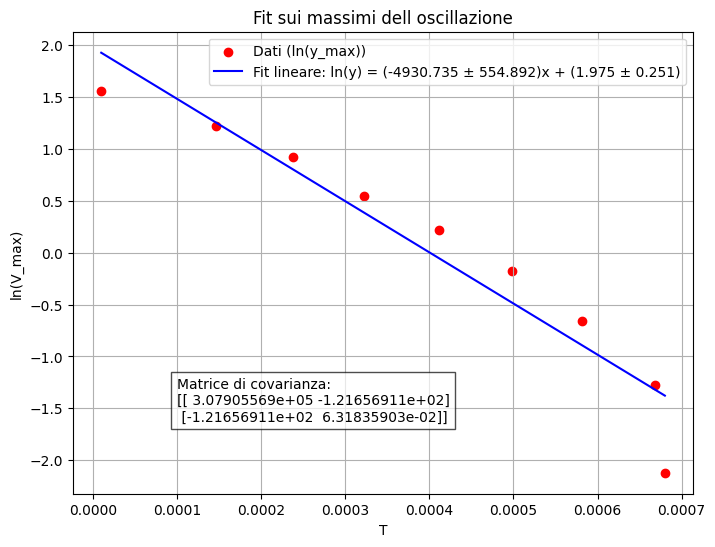

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dati
y_max = np.array([4.76, 3.4, 2.52, 1.72, 1.24, 0.84, 0.52, 0.28, 0.12])
x_max = np.array([-0.00248, -0.002344, -0.002252, -0.002168, -0.002078, -0.001992, -0.001908, -0.001822, -0.00181]) + 0.00249
ln_y_max = np.log(y_max)

# Fit lineare: funzione di una retta
def linear_func(x, a, b):
    return a * x + b

# Curve fit
params, covariance = curve_fit(linear_func, x_max, ln_y_max)
a, b = params  # Parametri della retta: a è la pendenza, b è l'intercetta

# Calcolo dell'errore sui parametri
a_err = np.sqrt(covariance[0, 0])  # Errore sulla pendenza
b_err = np.sqrt(covariance[1, 1])  # Errore sull'intercetta

# Calcolo di gamma
gamma = -a  # Gamma è l'opposto della pendenza

# Valori della retta
x_fit = np.linspace(min(x_max), max(x_max), 100)
y_fit = linear_func(x_fit, *params)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_max, ln_y_max, label='Dati (ln(y_max))', color='red')
plt.plot(x_fit, y_fit, label=f'Fit lineare: ln(y) = ({a:.3f} ± {a_err:.3f})x + ({b:.3f} ± {b_err:.3f})', color='blue')
plt.xlabel('T')
plt.ylabel('ln(V_max)')
plt.title('Fit sui massimi dell oscillazione')
plt.legend()
plt.grid()
plt.text(0.0001, min(ln_y_max) + 0.5, f"Matrice di covarianza:\n{covariance}", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
plt.savefig("PORCODIO.png")
plt.show()


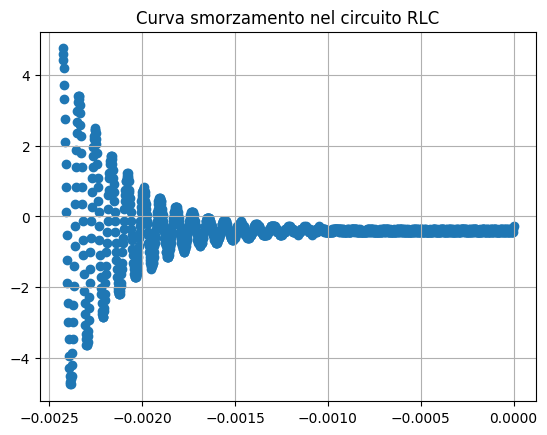

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


X1 = []
Y1 = []

counter = 0
with open('curvarlc.txt') as f:
    for line in f:
        for word in line.split():
            if((' ' in word)==False):
                if(counter == 0):
                    X1.append(float(word))
                    counter = 1
                else:
                    Y1.append(float(word))
                    counter = 0

y_max =np.array([4.76, 3.4, 2.52, 1.72, 1.24, 0.84, 0.52, 0.28, 0.12])
x_max=np.array([-0.00248,-0.002344, -0.002252, -0.002168, -0.002078, -0.001992, -0.001908, -0.001822, -0.00181])


plt.scatter(X1,Y1)
plt.grid()
plt.title("Curva smorzamento nel circuito RLC")
plt.savefig("RLC.png")
plt.show()